In [1]:
import requests
import pandas as pd
import folium
import json

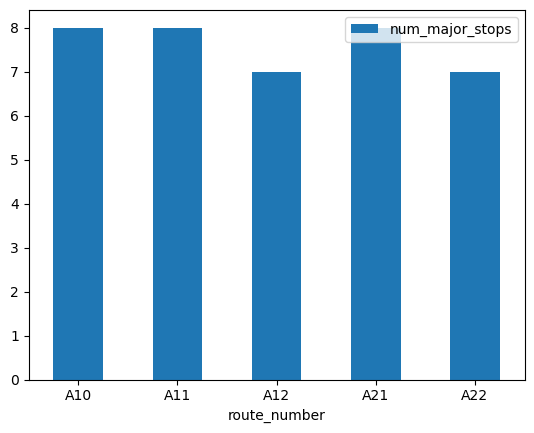

In [2]:
# Coordinates of major stops
coordinates = {
    "Ap Lei Chau Estate": [22.2484, 114.1535],
    "Aberdeen": [22.2480, 114.1548],
    "Wong Chuk Hang": [22.2480, 114.1605],
    "Wan Chai": [22.2762, 114.1757],
    "Central": [22.2829, 114.1588],
    "Western Harbour Crossing": [22.2884, 114.1558],
    "Tsing Yi": [22.3535, 114.1054],
    "Airport": [22.3080, 113.9185],
    "North Point Ferry Pier": [22.2933, 114.2018],
    "Causeway Bay": [22.2797, 114.1833],
    "Admiralty": [22.2783, 114.1655],
    "Sai Wan Ho Ferry Pier": [22.2867, 114.2155],
    "Shau Kei Wan": [22.2797, 114.2261],
    "Hung Hom Station": [22.3030, 114.1858],
    "Tsim Sha Tsui": [22.2973, 114.1722],
    "Jordan": [22.3042, 114.1717],
    "Mong Kok": [22.3193, 114.1706],
    "Prince Edward": [22.3244, 114.1688],
    "Lai Chi Kok": [22.3374, 114.1476],
    "Lam Tin Station": [22.3070, 114.2345],
    "Kwun Tong": [22.3138, 114.2219],
    "Ngau Tau Kok": [22.3152, 114.2141],
    "Kowloon Bay": [22.3237, 114.2031],
    "Kai Tak": [22.3240, 114.2010],
    "North Point": [22.2933, 114.2018] # 添加缺失的站点
}

# Bus route information
data_str = '''[{"route_number": "A10", "start_point": "Ap Lei Chau", "end_point": "Airport", "stops": ["Ap Lei Chau Estate", "Aberdeen", "Wong Chuk Hang", "Wan Chai", "Central", "Western Harbour Crossing", "Tsing Yi", "Airport"]}, {"route_number": "A11", "start_point": "North Point", "end_point": "Airport", "stops": ["North Point Ferry Pier", "Causeway Bay", "Wan Chai", "Admiralty", "Central", "Western Harbour Crossing", "Tsing Yi", "Airport"]}, {"route_number": "A12", "start_point": "Sai Wan Ho", "end_point": "Airport", "stops": ["Sai Wan Ho Ferry Pier", "Shau Kei Wan", "North Point", "Central", "Western Harbour Crossing", "Tsing Yi", "Airport"]}, {"route_number": "A21", "start_point": "Hung Hom", "end_point": "Airport", "stops": ["Hung Hom Station", "Tsim Sha Tsui", "Jordan", "Mong Kok", "Prince Edward", "Lai Chi Kok", "Tsing Yi", "Airport"]}, {"route_number": "A22", "start_point": "Lam Tin", "end_point": "Airport", "stops": ["Lam Tin Station", "Kwun Tong", "Ngau Tau Kok", "Kowloon Bay", "Kai Tak", "Tsing Yi", "Airport"]}]'''
data_dict = json.loads(data_str)

# Create a list to store the extracted information
routes = []

# Extract relevant information
for route in data_dict:
    route_number = route["route_number"]
    start_point = route["start_point"]
    end_point = route["end_point"]
    major_stops = route["stops"]

    # Add the information to the list
    routes.append({
        "route_number": route_number,
        "start_point": start_point,
        "end_point": end_point,
        "major_stops": major_stops
    })

# Convert the list to a pandas DataFrame
df = pd.DataFrame(routes)

# Calculate the number of major stops for each route
df["num_major_stops"] = df["major_stops"].apply(len)

# Calculate the average number of major stops per route
avg_num_major_stops = df["num_major_stops"].mean()

# Create a bar chart showing the number of major stops per route
df.plot.bar(x="route_number", y="num_major_stops", rot=0)

# Create a map showing the bus routes
m = folium.Map(location=[22.3193, 114.1694], zoom_start=11)

for index, row in df.iterrows():
    # Extract the major stops for the route
    major_stops = row["major_stops"]

    # Create a list of coordinates for the major stops
    coordinates_list = []
    for stop in major_stops:
        coordinates_list.append(coordinates[stop])

    # Add a polyline to the map representing the route
    folium.PolyLine(locations=coordinates_list, color="blue", weight=5).add_to(m)


In [ ]:
# Save the map as an HTML file
m.save("bus_routes.html")